# Finding the BEST Markets to Advertise in

The goal of this project is to find the two best markets to advertise product in for an e-learning company. Company offers courses on programming. Most of courses are on web and mobile development but they also covers many other domains like data science, game development etc. 

The data for this project comes from freeCodeCamp - free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of this analysis. The survey data is publicly available [here](https://github.com/freeCodeCamp/2017-new-coder-survey).

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
df.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(18175, 136)

## Understanding the data

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first hence for the purpose ofthis analysis I have used ready-made data. 

As mentioned in introduction most of our company courses are on web and mobile development, but many other domains are also covered, like data science, game development, etc. For the purpose of this analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What locations have the greatest densities of new coders.
- How much money they're willing to spend on learning.

So we first need to clarify whether the data set has the right categories of people for our purpose. The JobRoleInterest column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [4]:
df['JobRoleInterest'].value_counts(normalize = True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

From the frequency table above we can say:

- A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
- A few people are interested in mobile development.
- A few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. 

In the next step we will split each string in the JobRoleInterest column to find the number of options for each participant.
We'll first drop the null values because we can't split Nan values.
Next generate a frequency table for the variable describing the number of options.

In [5]:
df_no_null = df['JobRoleInterest'].dropna()
intrests_split = df_no_null.str.split(',')

In [6]:
number_of_options = intrests_split.apply(lambda x: len(x))
number_of_options.value_counts(normalize = True, ascending = False)* 100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

From the frequency table above we can say that only 31.7% of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

In [7]:
web_data = df_no_null.str.contains('Web Developer|Mobile Developer')
frequency_table = web_data.value_counts(normalize=True)*100
frequency_table

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

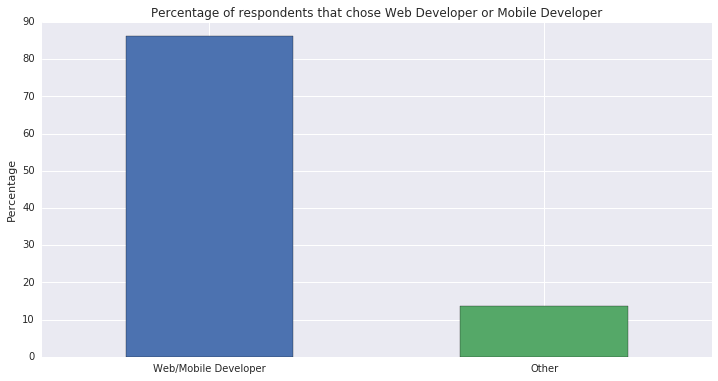

In [8]:
frequency_table.plot.bar(figsize = (12,6))
plt.title('Percentage of respondents that chose Web Developer or Mobile Developer')
plt.ylabel('Percentage')
plt.xticks([0,1], ['Web/Mobile Developer', 'Other'], rotation = 0)
plt.ylim = ([0,100])

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

## Analyzing Locations and Densities

Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

We can start by examining the frequency distribution table of the CountryLive variable, which describes what country each participant lives in (not their origin country). We'll only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.

In [9]:
df_clear = df[df['JobRoleInterest'].notnull()].copy()

In [10]:
absolute_frequency = df_clear['CountryLive'].value_counts()
relative_frequency = df_clear['CountryLive'].value_counts(normalize = True)*100

new_df = pd.DataFrame(data = {'Absolute frequency': absolute_frequency,
                             'Percentage': relative_frequency})
new_df

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


45.7% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.7%, which is not too far from the United Kingdom (4.6%) or Canada (3.8%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

## Money Spent on Learning

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of \$59 per month, and for this reason we're interested in finding out how much money each student spends per month.

We'll narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. We do this for two reasons:

These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each.
Our courses are written in English, and English is an official language in all these four countries. The more people know English, the better our chances to target the right people with our ads.

Let's start with creating a new column that describes the amount of money a student has spent per month so far. To do that, we'll need to divide the MoneyForLearning column to the MonthsProgramming column. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the MonthsProgramming column.

In [11]:
df_clear['MonthsProgramming'].replace(0,1,inplace = True)

In [12]:
df_clear['money_per_month'] = df_clear['MoneyForLearning']/df_clear['MonthsProgramming']

In [13]:
df_clear['money_per_month'].isnull().sum()

675

We have 675 null values in a new column hence we will keep only the not null rows. 

In [14]:
df_clear = df_clear[df_clear['money_per_month'].notnull()]

In [15]:
df_clear = df_clear[df_clear['CountryLive'].notnull()]

In [16]:
df_clear['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

This should be enough, so let's compute the average value spent per month in each country by a student. We'll compute the average using the mean.

In [17]:
countries_mean = df_clear.groupby('CountryLive').mean()

countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

## Dealing with outliers

In [18]:
four_countries = df_clear[df_clear['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')] 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([<matplotlib.axis.XTick at 0x7f4cd29ec588>,
 <a list of 4 Text xticklabel objects>)

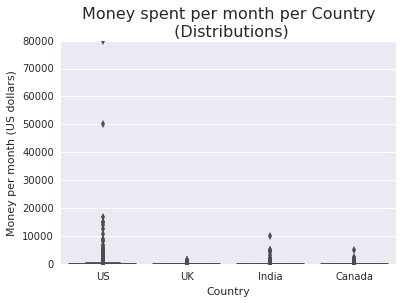

In [19]:
sns.boxplot(x = 'CountryLive', y = 'money_per_month', data = four_countries)
plt.title('Money spent per month per Country\n (Distributions)', fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Money per month (US dollars)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month \$50000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over \$20,000 per month.

In [20]:
df_clear = df_clear[df_clear['money_per_month'] < 20000]

Let's recompute the mean values and box plot again without outliers.

In [21]:
countries_mean = df_clear.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([<matplotlib.axis.XTick at 0x7f4cd29252b0>,
 <a list of 4 Text xticklabel objects>)

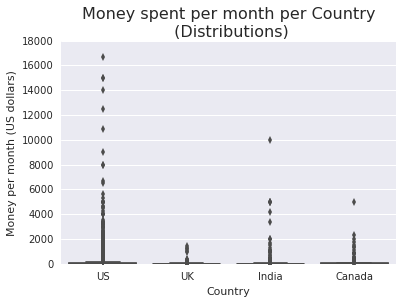

In [22]:
four_countries = df_clear[df_clear['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')] 

sns.boxplot(x = 'CountryLive', y = 'money_per_month', data = four_countries)
plt.title('Money spent per month per Country\n (Distributions)', fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Money per month (US dollars)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])


We can see a few extreme outliers for India (values over \$2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [23]:
india_outliers = four_countries[(four_countries['money_per_month'] > 2500) & 
                                (four_countries['CountryLive'] == 'India')]

india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these two rows.

In [24]:
four_countries = four_countries.drop(india_outliers.index)

Looking back at the box plot above, we can also see more extreme outliers for the US (values over \$6000 per month). Let's examine these participants in more detail.

In [25]:
usa_outliers = four_countries[(four_countries['money_per_month'] > 6000) & 
                                (four_countries['CountryLive'] == 'United States of America')]
usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend \$6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

- Didn't attend bootcamps.
- Had been programming for three months or less when at the time they completed the survey

In [26]:
no_bootcamp = four_countries[(four_countries['CountryLive']=='United States of America') &
                            (four_countries['AttendedBootcamp'] == 0) &
                            (four_countries['money_per_month']>= 6000)]

four_countries = four_countries.drop(no_bootcamp.index)

In [28]:
less_than_three = four_countries[(four_countries['CountryLive']=='United States of America') &
                            (four_countries['MonthsProgramming'] <= 3) &
                            (four_countries['money_per_month']>= 6000)]

four_countries = four_countries.drop(less_than_three.index)

Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly \$5000 per month. Let's examine this person in more depth.

In [29]:
canada_outlier = four_countries[(four_countries['CountryLive']=='Canada') &
                            (four_countries['money_per_month']>= 5000)]
canada_outlier     

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [30]:
four_countries = four_countries.drop(canada_outlier.index)

In [31]:
four_countries.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([<matplotlib.axis.XTick at 0x7f4cd287f390>,
 <a list of 4 Text xticklabel objects>)

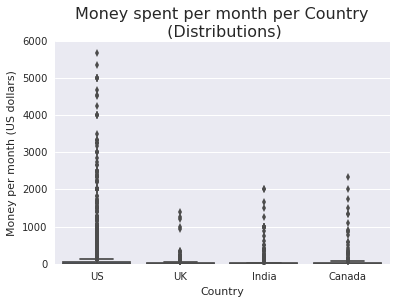

In [32]:
sns.boxplot(x = 'CountryLive', y = 'money_per_month', data = four_countries)
plt.title('Money spent per month per Country\n (Distributions)', fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Money per month (US dollars)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

## Choosing the Best Two Markets

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$143).

We sell subscriptions at a price of \$59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly \$93 per month, compared to India (\$66) and the United Kingdom (\$45).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

$59 doesn't seem like an expensive sum for people in India since they spend on average \$66 each month.
We have almost twice as more potential customers in India than we have in Canada:

In [33]:
four_countries['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

It's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

- 60% for the US, 25% for India, 15% for Canada.
- 50% for the US, 30% for India, 20% for Canada; etc.

2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

- 70% for the US, and 30% for India.
- 65% for the US, and 35% for Canada; etc.

3. Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

## Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.